In [1]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product

In [2]:

# Paths to CSV files
csv_files = [
    "./csv_files_after_method/results_tr_with_threshold.csv",  # Transient
    "./csv_files_after_method/results_wt_with_threshold.csv",  # Wattmetric
    "./csv_files_after_method/results_fh_with_threshold.csv"
]


In [3]:
# Read and combine data
dfs = [pd.read_csv(file) for file in csv_files]
df = pd.concat(dfs, ignore_index=True)

# Fill missing values with 0
df.fillna(0, inplace=True)

In [4]:
# Encode categorical features
label_encoders = {}
categorical_cols = ["DetectedFaultDirection", "OriginalDirection", "algorithm_used"]
# Convert categorical columns to string before encoding
for col in categorical_cols:
    df[col] = df[col].astype(str)  # Ensure all values are strings
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store for inverse transformation if needed

In [5]:
# Define features (X) and target (y)
features = [
    "RawVoltage1", "RawVoltage2", "RawVoltage3",
    "RawCurrent1", "RawCurrent2", "RawCurrent3",
    "U0", "I0", "U0Threshold", "I0Threshold", "Power Threshold", "Q_threshold", "U0_max", "I0_max", 
    "dU0_dt", "dI0_dt", "dominant_freq_U0", "high_freq_energy_U0",
    "spectral_entropy_U0", "ActivePower", "ReactivePower",
    "PhaseDifference", "Q5", "PhaseDifference_5th"
]

In [6]:
# Select features and target variable
X = df[features]  # Drop non-relevant ID column
y = df["OriginalDirection"]  # Target variable is the actual correct fault direction

# # Encode the categorical target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Normalize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


In [8]:
# Train a machine learning model (Random Forest)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [9]:
# Predict on test set
y_pred = model.predict(X_test)


In [10]:
# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))


Model Accuracy: 0.9738
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3629
           1       0.94      0.95      0.95      3629
           2       1.00      1.00      1.00      3629
           3       0.95      0.94      0.95      3629

    accuracy                           0.97     14516
   macro avg       0.97      0.97      0.97     14516
weighted avg       0.97      0.97      0.97     14516



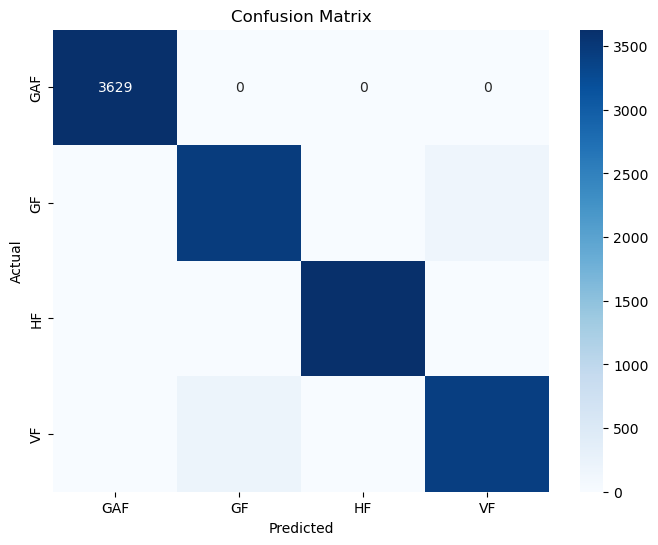

In [11]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoders["OriginalDirection"].classes_,
            yticklabels=label_encoders["OriginalDirection"].classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

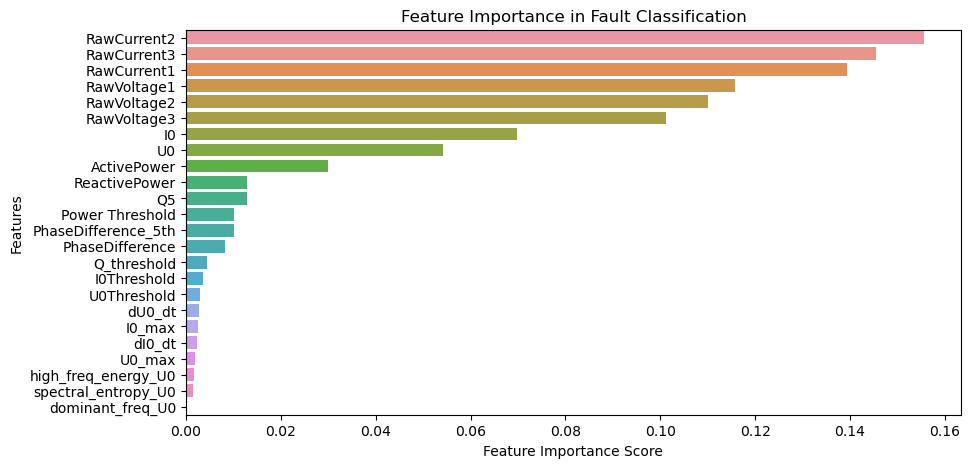

Feature Importance Scores:
                Feature  Importance
4           RawCurrent2    0.155594
5           RawCurrent3    0.145509
3           RawCurrent1    0.139400
0           RawVoltage1    0.115812
1           RawVoltage2    0.110142
2           RawVoltage3    0.101226
7                    I0    0.069867
6                    U0    0.054107
19          ActivePower    0.029976
20        ReactivePower    0.012982
22                   Q5    0.012795
10      Power Threshold    0.010195
23  PhaseDifference_5th    0.010041
21      PhaseDifference    0.008280
11          Q_threshold    0.004481
9           I0Threshold    0.003673
8           U0Threshold    0.003061
14               dU0_dt    0.002807
13               I0_max    0.002472
15               dI0_dt    0.002361
12               U0_max    0.001846
17  high_freq_energy_U0    0.001641
18  spectral_entropy_U0    0.001487
16     dominant_freq_U0    0.000247
Classification Report:
              precision    recall  f1-score   supp

In [12]:

# Feature Importance
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Plot Feature Importance
plt.figure(figsize=(10, 5))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Fault Classification")
plt.show()

# Print feature importance values
print("Feature Importance Scores:")
print(feature_importance_df)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoders["OriginalDirection"].classes_))

In [13]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


<b>Trying a Different Model</b>

In [14]:
from xgboost import XGBClassifier
clf = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

Model Accuracy: 0.9789
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3629
           1       0.94      0.98      0.96      3629
           2       1.00      1.00      1.00      3629
           3       0.98      0.94      0.96      3629

    accuracy                           0.98     14516
   macro avg       0.98      0.98      0.98     14516
weighted avg       0.98      0.98      0.98     14516



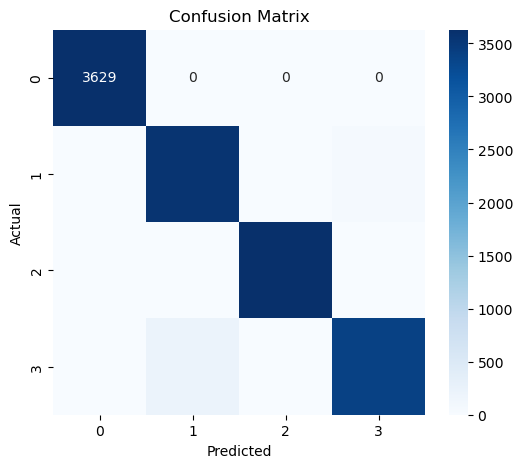

In [15]:
# Make predictions
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Generate Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [30]:
# Find the best threshold combinations
best_transient, acc_transient = find_best_combination(["U0Threshold", "I0Threshold"], df)
best_wattmetric, acc_wattmetric = find_best_combination(["U0Threshold", "I0Threshold", "Power Threshold"], df)
best_fh, acc_fh = find_best_combination(["U0Threshold", "I0Threshold", "Q_threshold"], df)

# Print results
print("\nBest Threshold Combinations:")
print(f"Transient (U0Threshold, I0Threshold): {best_transient} -> Accuracy: {acc_transient:.4f}")
print(f"Wattmetric (U0Threshold, I0Threshold, Power Threshold): {best_wattmetric} -> Accuracy: {acc_wattmetric:.4f}")
print(f"FH (U0Threshold, I0Threshold, Q_threshold): {best_fh} -> Accuracy: {acc_fh:.4f}")



Best Threshold Combinations:
Transient (U0Threshold, I0Threshold): (2000.0, 20.0) -> Accuracy: 0.9728
Wattmetric (U0Threshold, I0Threshold, Power Threshold): (4000.0, 30.0, 3.0) -> Accuracy: 0.9604
FH (U0Threshold, I0Threshold, Q_threshold): (2000.0, 20.0, 0.0) -> Accuracy: 0.9728


In [29]:

def find_best_combination(threshold_cols, df):
    # Get unique threshold combinations
    unique_combinations = df[threshold_cols].drop_duplicates()

    best_accuracy = 0
    best_combination = None

    for _, thresholds in unique_combinations.iterrows():  # Changed to iterrows()
        # Filter dataset for the current threshold combination
        condition = np.logical_and.reduce([df[col] == thresholds[col] for col in threshold_cols])
        df_filtered = df[condition]

        # Filter out unexpected power values (keep only 3, 4, 5, and 2)
        if "Power Threshold" in df.columns:
            df_filtered = df_filtered[df_filtered["Power Threshold"].isin([3, 4, 5, 2])]

        
        # If no data left after filtering, skip this iteration
        if df_filtered.empty:
            continue

        # Define features and target
        features = [
            "RawVoltage1", "RawVoltage2", "RawVoltage3",
            "RawCurrent1", "RawCurrent2", "RawCurrent3",
            "U0", "I0", "U0Threshold", "I0Threshold", "Power Threshold", "Q_threshold", 
            "U0_max", "I0_max", "dU0_dt", "dI0_dt", "dominant_freq_U0", "high_freq_energy_U0",
            "spectral_entropy_U0", "ActivePower", "ReactivePower",
            "PhaseDifference", "Q5", "PhaseDifference_5th"
        ]

        # Ensure all selected features exist in dataframe
        df_filtered = df_filtered.dropna(subset=features + ["OriginalDirection"])
        
        X = df_filtered[features]
        y = df_filtered["OriginalDirection"]

        # Encode categorical target variable
        label_encoder = LabelEncoder()
        y = label_encoder.fit_transform(y)

        # Normalize numerical features
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)

        # Split dataset
        X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

        # Train model
        model = RandomForestClassifier(n_estimators=100, random_state=42)
        model.fit(X_train, y_train)

        # Predict and evaluate
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        # Store best combination
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_combination = tuple(thresholds[col] for col in threshold_cols)

    return best_combination, best_accuracy
